In [1]:
import pandas as pd
import os

In [2]:
DMS_reference = pd.read_csv('../data/reference_files/DMS_substitutions.csv')

In [3]:
DMS_reference.head(5)

,DMS_id,DMS_filename,UniProt_ID,taxon,source_organism,target_seq,seq_len,includes_multiple_mutants,DMS_total_number_mutants,DMS_number_single_mutants,...,raw_DMS_filename,raw_DMS_phenotype_name,raw_DMS_directionality,raw_DMS_mutant_column,weight_file_name,pdb_file,pdb_range,ProteinGym_version,raw_mut_offset,coarse_selection_type
0,A0A140D2T1_ZIKV_Sourisseau_2019,A0A140D2T1_ZIKV_Sourisseau_2019.csv,A0A140D2T1_ZIKV,Virus,Zika virus,MKNPKKKSGGFRIVNMLKRGVARVNPLGGLKRLPAGLLLGHGPIRM...,3423,False,9576,9576,...,A0A140D2T1_ZIKV_Sourisseau_growth_2019.csv,effect,1,mutant,A0A140D2T1_ZIKV_theta_0.01.npy,A0A140D2T1_ZIKV.pdb,291-794,0.1,NaN,OrganismalFitness
1,A0A192B1T2_9HIV1_Haddox_2018,A0A192B1T2_9HIV1_Haddox_2018.csv,A0A192B1T2_9HIV1,Virus,HIV,MRVKGIQMNSQHLLRWGIMILGMIMICSVAGNLWVTVYYGVPVWKD...,852,False,12577,12577,...,A0A192B1T2_9HIV1_Haddox_2018.csv,fitness,1,mutant,A0A192B1T2_9HIV1_theta_0.01.npy,A0A192B1T2_9HIV1.pdb,1-852,0.1,NaN,OrganismalFitness
2,A0A1I9GEU1_NEIME_Kennouche_2019,A0A1I9GEU1_NEIME_Kennouche_2019.csv,A0A1I9GEU1_NEIME,Prokaryote,Neisseria meningitidis,FTLIELMIVIAIVGILAAVALPAYQDYTARAQVSEAILLAEGQKSA...,161,False,922,922,...,A0A1I9GEU1_NEIME_Kennouche_2019.csv,piliation_log2_ratio,1,mutants,A0A1I9GEU1_NEIME_theta_0.2.npy,A0A1I9GEU1_NEIME.pdb,1-161,0.1,NaN,Activity
3,A0A247D711_LISMN_Stadelmann_2021,A0A247D711_LISMN_Stadelmann_2021.csv,A0A247D711_LISMN,Eukaryote,Listeria monocytogenes,MNINDLIREIKNKDYTVKLSGTDSNSITQLIIRVNNDGNEYVISES...,87,False,1653,1653,...,A0A247D711_LISMN_Stadelmann_2021.csv,mean_prediction,1,mutant,A0A247D711_LISMN_b03_theta_0.2.npy,A0A247D711_LISMN.pdb,1-87,1.0,NaN,Activity
4,A0A2Z5U3Z0_9INFA_Doud_2016,A0A2Z5U3Z0_9INFA_Doud_2016.csv,A0A2Z5U3Z0_9INFA,Virus,influenza H1N1,MKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHS...,565,False,10715,10715,...,A0A2Z5U3Z0_9INFA_Doud_2016.csv,transformed_pref,1,mutant,A0A2Z5U3Z0_9INFA_theta_0.01.npy,A0A2Z5U3Z0_9INFA.pdb,1-565,0.1,NaN,OrganismalFitness


In [4]:
# 设置文件夹路径
folder_path = '../data/substitutions_singles/'

# 获取所有 CSV 文件
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 读取所有 CSV 文件并合并为一个 DataFrame
dataframes = []
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    target_seq = DMS_reference[DMS_reference['DMS_filename']==csv_file]['target_seq'].values[0]
    df['target_seq'] = target_seq
    dataframes.append(df)

# 合并所有 DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# 显示合并后的 DataFrame
merged_df

,mutant,mutated_sequence,DMS_score,DMS_score_bin,fold_random_5,fold_modulo_5,fold_contiguous_5,target_seq
0,A296D,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.729872,0.0,4,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...
1,A296E,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.581588,0.0,2,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...
2,A296F,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.606695,0.0,0,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...
3,A296G,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.598207,0.0,4,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...
4,A296I,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.527510,0.0,3,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...
...,...,...,...,...,...,...,...,...
696306,Y35R,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVRHGTLLDNDGKK...,-2.182785,0.0,2,4,0,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKK...
696307,Y35S,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVSHGTLLDNDGKK...,-2.099110,0.0,4,4,0,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKK...
696308,Y35T,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVTHGTLLDNDGKK...,-2.191593,0.0,3,4,0,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKK...
696309,Y35V,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVVHGTLLDNDGKK...,0.179373,1.0,0,4,0,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKK...


In [5]:
merged_df['PID'] = merged_df.index
merged_df

,mutant,mutated_sequence,DMS_score,DMS_score_bin,fold_random_5,fold_modulo_5,fold_contiguous_5,target_seq,PID
0,A296D,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.729872,0.0,4,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0
1,A296E,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.581588,0.0,2,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,1
2,A296F,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.606695,0.0,0,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,2
3,A296G,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.598207,0.0,4,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,3
4,A296I,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.527510,0.0,3,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,4
...,...,...,...,...,...,...,...,...,...
696306,Y35R,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVRHGTLLDNDGKK...,-2.182785,0.0,2,4,0,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKK...,696306
696307,Y35S,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVSHGTLLDNDGKK...,-2.099110,0.0,4,4,0,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKK...,696307
696308,Y35T,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVTHGTLLDNDGKK...,-2.191593,0.0,3,4,0,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKK...,696308
696309,Y35V,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVVHGTLLDNDGKK...,0.179373,1.0,0,4,0,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKK...,696309


In [6]:
import re
def get_pos(row):
    pos = []
    for mut in row['mutant'].split(':'):
        result = int(re.findall(r'\d+', mut)[0])-1
        pos.append(result)
    if len(pos)<=1:return pos[0]
    else:
        return pos


merged_df['mut_pos']=merged_df.apply(get_pos,axis=1)

In [7]:
merged_df

,mutant,mutated_sequence,DMS_score,DMS_score_bin,fold_random_5,fold_modulo_5,fold_contiguous_5,target_seq,PID,mut_pos
0,A296D,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.729872,0.0,4,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0,295
1,A296E,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.581588,0.0,2,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,1,295
2,A296F,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.606695,0.0,0,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,2,295
3,A296G,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.598207,0.0,4,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,3,295
4,A296I,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.527510,0.0,3,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,4,295
...,...,...,...,...,...,...,...,...,...,...
696306,Y35R,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVRHGTLLDNDGKK...,-2.182785,0.0,2,4,0,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKK...,696306,34
696307,Y35S,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVSHGTLLDNDGKK...,-2.099110,0.0,4,4,0,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKK...,696307,34
696308,Y35T,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVTHGTLLDNDGKK...,-2.191593,0.0,3,4,0,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKK...,696308,34
696309,Y35V,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVVHGTLLDNDGKK...,0.179373,1.0,0,4,0,NPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKK...,696309,34


/home/binyun/mambaforge/envs/esm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/binyun/mambaforge/envs/esm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/binyun/mambaforge/envs/esm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/binyun/mambaforge/envs/esm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/binyun/mambaforge/envs/esm/lib/python3.12/site-packages/IPython/core/pylabtools.py

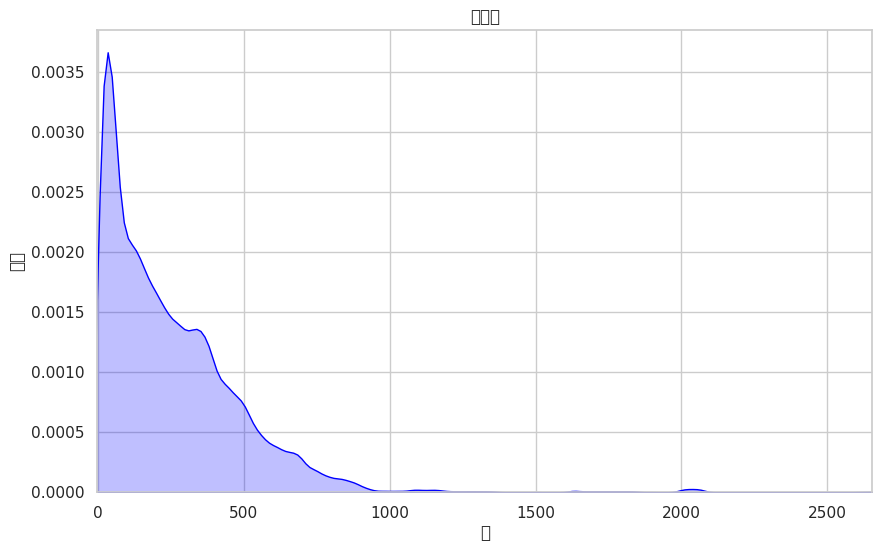

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题
sns.set_theme(style="whitegrid")

# 绘制高斯分布图
plt.figure(figsize=(10, 6))
sns.kdeplot(merged_df['mut_pos'], fill=True, color='blue')
plt.title('分布图')
plt.xlabel('值')
plt.ylabel('密度')
plt.xlim(merged_df['mut_pos'].min() - 1,merged_df['mut_pos'].max() + 1)
plt.show()

In [9]:
cleaned_merged_df = merged_df[merged_df['mut_pos']<1023]

In [10]:
test_df = cleaned_merged_df.sample(5000)

In [16]:
def split_data(split_path,df):
    fold_types = ['fold_random_5','fold_modulo_5','fold_contiguous_5']
    for fold_type in fold_types:
        data_path = os.path.join('../data/',split_path,fold_type)
        if os.path.exists(data_path):
            print(data_path+'------已创建')
        else:
            os.makedirs(data_path)
            print(data_path+'------已创建')
        for i in range(5):
            data = df[df[fold_type]==i]
            data.to_csv(os.path.join(data_path,f'data_{i}.csv'))


In [17]:
split_data('test_model_data/',test_df)

../data/test_model_data/fold_random_5------已创建
../data/test_model_data/fold_modulo_5------已创建
../data/test_model_data/fold_contiguous_5------已创建


In [12]:
# fold_types = ['fold_random_5','fold_modulo_5','fold_contiguous_5']
# for fold_tppe in fold_types:
#     data_path = os.path.join('../data/','cleaned_split_data_singles/',fold_tppe)
#     if os.path.exists(data_path):
#         print(data_path+'------已创建')
#     else:
#         os.makedirs(data_path)
#         print(data_path+'------已创建')
#     for i in range(5):
#         data = cleaned_merged_df[cleaned_merged_df[fold_tppe]==i]
#         data.to_csv(os.path.join(data_path,f'data_{i}.csv'))

    

In [13]:
from difflib import SequenceMatcher

def find_difference_positions(row):
    s1, s2 = row['mutated_sequence'],row['target_seq']
    return [i for i, (c1, c2) in enumerate(zip(s1, s2)) if c1 != c2]


test = merged_df.head(2)
test


,mutant,mutated_sequence,DMS_score,DMS_score_bin,fold_random_5,fold_modulo_5,fold_contiguous_5,target_seq,PID,mut_pos
0,A296D,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.729872,0.0,4,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0,295
1,A296E,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.581588,0.0,2,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,1,295


In [14]:
test['p'] = test.apply(find_difference_positions,axis=1)
test

/tmp/ipykernel_3819848/2058392678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['p'] = test.apply(find_difference_positions,axis=1)


,mutant,mutated_sequence,DMS_score,DMS_score_bin,fold_random_5,fold_modulo_5,fold_contiguous_5,target_seq,PID,mut_pos,p
0,A296D,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.729872,0.0,4,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0,295,[295]
1,A296E,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.581588,0.0,2,1,0,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,1,295,[295]


In [1]:
path = '/home/binyun/Project/ConFit-proteinGym/data/ProteinNPT_data/fitness/substitutions_singles'

In [5]:
import os
# 获取所有 CSV 文件
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_files

['SRC_HUMAN_Chakraborty_2023_binding-DAS_25uM.csv',
 'VKOR1_HUMAN_Chiasson_2020_abundance.csv',
 'RASK_HUMAN_Weng_2022_binding-DARPin_K55.csv',
 'CAS9_STRP1_Spencer_2017_positive.csv',
 'Q53Z42_HUMAN_McShan_2019_binding-TAPBPR.csv',
 'CASP3_HUMAN_Roychowdhury_2020.csv',
 'PSAE_SYNP2_Tsuboyama_2023_1PSE.csv',
 'OTU7A_HUMAN_Tsuboyama_2023_2L2D.csv',
 'TPOR_HUMAN_Bridgford_2020.csv',
 'FKBP3_HUMAN_Tsuboyama_2023_2KFV.csv',
 'GFP_AEQVI_Sarkisyan_2016.csv',
 'A4GRB6_PSEAI_Chen_2020.csv',
 'SPIKE_SARS2_Starr_2020_binding.csv',
 'RPC1_LAMBD_Li_2019_low-expression.csv',
 'UBR5_HUMAN_Tsuboyama_2023_1I2T.csv',
 'YNZC_BACSU_Tsuboyama_2023_2JVD.csv',
 'DYR_ECOLI_Thompson_2019.csv',
 'A4D664_9INFA_Soh_2019.csv',
 'NPC1_HUMAN_Erwood_2022_RPE1.csv',
 'RPC1_BP434_Tsuboyama_2023_1R69.csv',
 'HXK4_HUMAN_Gersing_2023_abundance.csv',
 'CP2C9_HUMAN_Amorosi_2021_abundance.csv',
 'HEM3_HUMAN_Loggerenberg_2023.csv',
 'BCHB_CHLTE_Tsuboyama_2023_2KRU.csv',
 'RASH_HUMAN_Bandaru_2017.csv',
 'HSP82_YEAST_Flynn_201

In [33]:
import re
def get_pos(row):
    pos = []
    for mut in row['mutant'].split(':'):
        result = int(re.findall(r'\d+', mut)[0])
        pos.append(result)
    if len(pos)<=1:return pos[0]
    else:
        return pos
def get_wt(seq, mut):
    # mut的输入为A2D, or A2D:B3C
    pos = []
    chars = []
    
    for mutation in mut.split(':'):
        original_char = mutation[0]  # 获取原始字符
        position = int(re.findall(r'\d+', mutation)[0])  # 获取位置
        pos.append(position)
        chars.append(original_char)  # 保存原始字符
    
    seq = list(seq)
    for i, p in enumerate(pos):
        seq[p - 1] = chars[i]  # 替换为原始字符
    
    return ''.join(seq)

    


In [34]:
get_wt('MQHAFTPLEPLLSTGNLKYCLVILNQPLDNYFRHLWNKALLRACADGGANRLYDITEGERESFLPEFINGDFDSIRPEVREYYATKGCELISTPDQDHTDFTKCLKMLQKKIEEKDLKVDVIVTLGGLAGRFDQIMASVNTLFQATHITPFPIIIIQEESLIYLLQPGKHRLHVDTGMEGDWCGLIPVGQPCMQVTTTGLKWNLTNDVLAFGTLVSTSNTYDGSGVVTVETDHPLLWTMAIKS','A2D')

'MAHAFTPLEPLLSTGNLKYCLVILNQPLDNYFRHLWNKALLRACADGGANRLYDITEGERESFLPEFINGDFDSIRPEVREYYATKGCELISTPDQDHTDFTKCLKMLQKKIEEKDLKVDVIVTLGGLAGRFDQIMASVNTLFQATHITPFPIIIIQEESLIYLLQPGKHRLHVDTGMEGDWCGLIPVGQPCMQVTTTGLKWNLTNDVLAFGTLVSTSNTYDGSGVVTVETDHPLLWTMAIKS'

In [42]:
import pandas as pd
import shutil
def split_data(dataset,data_path):
    if isinstance(dataset, list):
        for csv_file in dataset:
            df = pd.read_csv(os.path.join(data_path,csv_file))
            df['mut_pos'] = df.apply(get_pos,axis = 1)
            wt_seq = get_wt(df['mutated_sequence'][0],df['mutant'][0])
            df['target_seq'] = wt_seq
            df['PID'] = df.index
            df = df[df['mut_pos']<1023]
            split_data_path = os.path.join(data_path,csv_file.split('.')[0])
            if os.path.exists(split_data_path):
                print(f'----------------->{csv_file}{"-" * (60 - len(csv_file))} 数据集已经划分！删除重新划分')
                shutil.rmtree(split_data_path)
            os.makedirs(split_data_path)
            fold_types = ['fold_random_5','fold_modulo_5','fold_contiguous_5']
            for fold_type in fold_types:
                for i in range(5):
                    data = df[df[fold_type]==i]
                    data.to_csv(os.path.join(split_data_path,f'{csv_file.split('.')[0]}_{fold_type}_data_{i}.csv'),index = False)
            print(f'----------------->{csv_file}{"-" * (60 - len(csv_file))} 数据集已经划分！')
    else:
        df = pd.read_csv(os.path.join(data_path,dataset))
        df['mut_pos'] = df.apply(get_pos,axis = 1)
        wt_seq = get_wt(df['mutated_sequence'][0],df['mutant'][0])
        df['target_seq'] = wt_seq
        df['PID'] = df.index
        df = df[df['mut_pos']<1023]
        split_data_path = os.path.join(data_path,dataset.split('.')[0])
        if os.path.exists(split_data_path):
            print(f'----------------->{dataset}{"-" * (60 - len(dataset))} 数据集已经划分！删除重新划分')
            shutil.rmtree(split_data_path)

        os.makedirs(split_data_path)
        fold_types = ['fold_random_5','fold_modulo_5','fold_contiguous_5']
        for fold_type in fold_types:
            for i in range(5):
                data = df[df[fold_type]==i]
                data.to_csv(os.path.join(split_data_path,f'{dataset.split('.')[0]}_{fold_type}_data_{i}.csv'),index = False)
        print(f'----------------->{dataset}{"-" * (60 - len(dataset))} 数据集已经划分！')


In [43]:
dataset = ['A4_HUMAN_Seuma_2022.csv','AMFR_HUMAN_Tsuboyama_2023_4G3O.csv']
split_data(dataset,path)

----------------->A4_HUMAN_Seuma_2022.csv------------------------------------- 数据集已经划分！删除重新划分
----------------->A4_HUMAN_Seuma_2022.csv------------------------------------- 数据集已经划分！
----------------->AMFR_HUMAN_Tsuboyama_2023_4G3O.csv-------------------------- 数据集已经划分！删除重新划分
----------------->AMFR_HUMAN_Tsuboyama_2023_4G3O.csv-------------------------- 数据集已经划分！


In [19]:
tt = '-----------------'
len('HSP82_YEAST_Cote-Hammarlof_2020_growth-H2O2.csv')

47

In [44]:
split_data('SRC_HUMAN_Chakraborty_2023_binding-DAS_25uM.csv',path)

----------------->SRC_HUMAN_Chakraborty_2023_binding-DAS_25uM.csv------------- 数据集已经划分！删除重新划分
----------------->SRC_HUMAN_Chakraborty_2023_binding-DAS_25uM.csv------------- 数据集已经划分！


In [30]:
pd.read_csv('/home/binyun/Project/ConFit-proteinGym/data/ProteinNPT_data/fitness/substitutions_singles/YNZC_BACSU_Tsuboyama_2023_2JVD.csv')['mutated_sequence'][0]

'MISNAKIARINELDAKAKAGVITEEEKAEQQKLRQEYLK'

In [1]:
from datetime import datetime

# 获取当前日期
current_date = datetime.now().date()

print(current_date)

2024-07-29


In [2]:
from datetime import datetime

# 获取当前日期和时间，精确到分钟
current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M")

print(current_datetime)

2024-07-29 15:57


In [2]:
import numpy as np

def listmle_loss(scores, true_order):
    """
    计算ListMLE损失函数

    参数:
    scores (ndarray): 文档得分数组，形状为 (n,)
    true_order (ndarray): 文档的真实排序索引，形状为 (n,)

    返回:
    float: ListMLE损失
    """
    n = len(scores)
    loss = 0.0
    
    for i in range(n):
        true_idx = true_order[i]
        score_true = scores[true_idx]
        sum_exp = np.sum(np.exp(scores[true_order[i:]]))
        loss -= score_true - np.log(sum_exp)
    
    return loss

# 示例使用
scores = np.array([2.2, 0.9, 2.5, 1.1])
true_order = np.array([2, 0, 3, 1])  # 假设正确排序是索引2, 0, 3, 1

loss = listmle_loss(scores, true_order)
print(f"ListMLE损失: {loss}")

ListMLE损失: 1.8551008113917982


In [9]:
import random
random.randint(0, 4)

3

In [11]:
import torch
def listmle_loss(scores, golden_score):
    """
    Calculate ListMLE loss function.

    Parameters:
    scores (ndarray or tensor): Document scores, shape (n,)
    golden_score (ndarray or tensor): True ranking scores, shape (n,)

    Returns:
    float: ListMLE loss
    """
    n = len(scores)
    loss = 0.0
    
    # Ensure inputs are tensors
    if isinstance(scores, np.ndarray):
        scores = torch.tensor(scores).cuda()
    if isinstance(golden_score, np.ndarray):
        golden_score = torch.tensor(golden_score).cuda()

    # Sort indices based on golden_score for true ordering
    true_order = torch.argsort(golden_score, descending=True)

    for i in range(n):
        true_idx = true_order[i]
        score_true = scores[true_idx]
        sum_exp = torch.sum(torch.exp(scores[true_order[i:]]))
        loss -= score_true - torch.log(sum_exp)
    
    return loss

# Example usage
scores = torch.tensor([0.2, 0.5, 0.1]).cuda()
golden_score = torch.tensor([1, 2, 0]).cuda()
loss = listmle_loss(scores, golden_score)
print(loss.item())

1.5244956016540527


In [1]:
from peft import peft_model,PeftModel
help(PeftModel.from_pretrained)

Help on method from_pretrained in module peft.peft_model:

from_pretrained(model: 'torch.nn.Module', model_id: 'Union[str, os.PathLike]', adapter_name: 'str' = 'default', is_trainable: 'bool' = False, config: 'Optional[PeftConfig]' = None, **kwargs: 'Any') -> 'PeftModel' class method of peft.peft_model.PeftModel
    Instantiate a PEFT model from a pretrained model and loaded PEFT weights.

    Note that the passed `model` may be modified inplace.

    Args:
        model ([`torch.nn.Module`]):
            The model to be adapted. For 🤗 Transformers models, the model should be initialized with the
            [`~transformers.PreTrainedModel.from_pretrained`].
        model_id (`str` or `os.PathLike`):
            The name of the PEFT configuration to use. Can be either:
                - A string, the `model id` of a PEFT configuration hosted inside a model repo on the Hugging Face
                  Hub.
                - A path to a directory containing a PEFT configuration file saved 